In [1]:
from neuralogic.nn import get_evaluator
from neuralogic.core import R, Template, V, C, Settings, Transformation, Combination, Aggregation
from neuralogic.core.constructs.function.tree import FunctionContainer
from neuralogic.core.settings import Settings
from neuralogic.dataset import Dataset
from neuralogic.optim import SGD

F = FunctionContainer()
train_dataset = Dataset()
template = Template() 

train_dataset.add_examples(
    [
        [
            R.node(C.a)[1], R.node(C.b)[2], R.node(C.c)[3],
            R.edge(C.a, C.b)[5], R.edge(C.b, C.a)[5], R.edge(C.a, C.c)[5], R.edge(C.c, C.a)[5]
        ]
    ]
)

train_dataset.add_queries([
    R.predict(C.a)["w3": 1]
])

C:\Users\kraus\Plocha\BAK\PyNeuraLogicFork\neuralogic\core\builder\builder.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [14]:
template += (R.predict(V.X) <= (R.node(V.Y)["w1": 1], R.edge(V.Y, V.X)["w2": 1])) | [Combination.AVG, Transformation.RELU, Aggregation.AVG]
template += (R.predict(V.X) <= F.avg[F.relu(R.node(V.Y) + R.edge(V.Y, V.X))])

template += (R.predict(V.X) <= (R.node(V.Y)["w1": 1], R.edge(V.Y, V.X)["w2": 1])) | [Combination.AVG, Transformation.IDENTITY]

template += R.predict(V.X) <= F.avg(R.node(V.Y) & R.edge(V.Y, V.X), R.edge(V.X))


template += (R.predict(V.X) <= F.avg(R.node(V.Y), R.edge(V.Y, V.X), R.edge(V.X)))


In [2]:
template += R.predict(V.X) <= F.softmax(R.node(V.Y) & R.edge(V.Y, V.X), R.edge(V.X))

TypeError: FunctionContainer.FunctionCallSimulator.__call__() takes 2 positional arguments but 3 were given

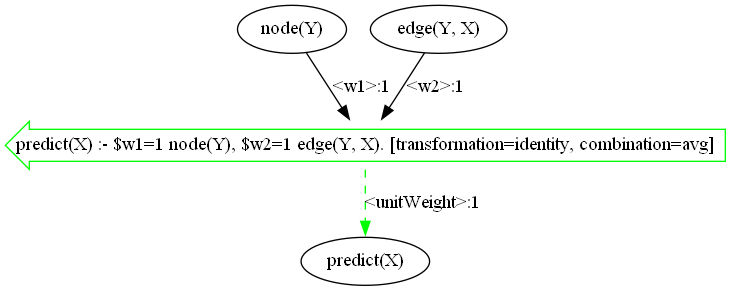

In [15]:
template.draw()

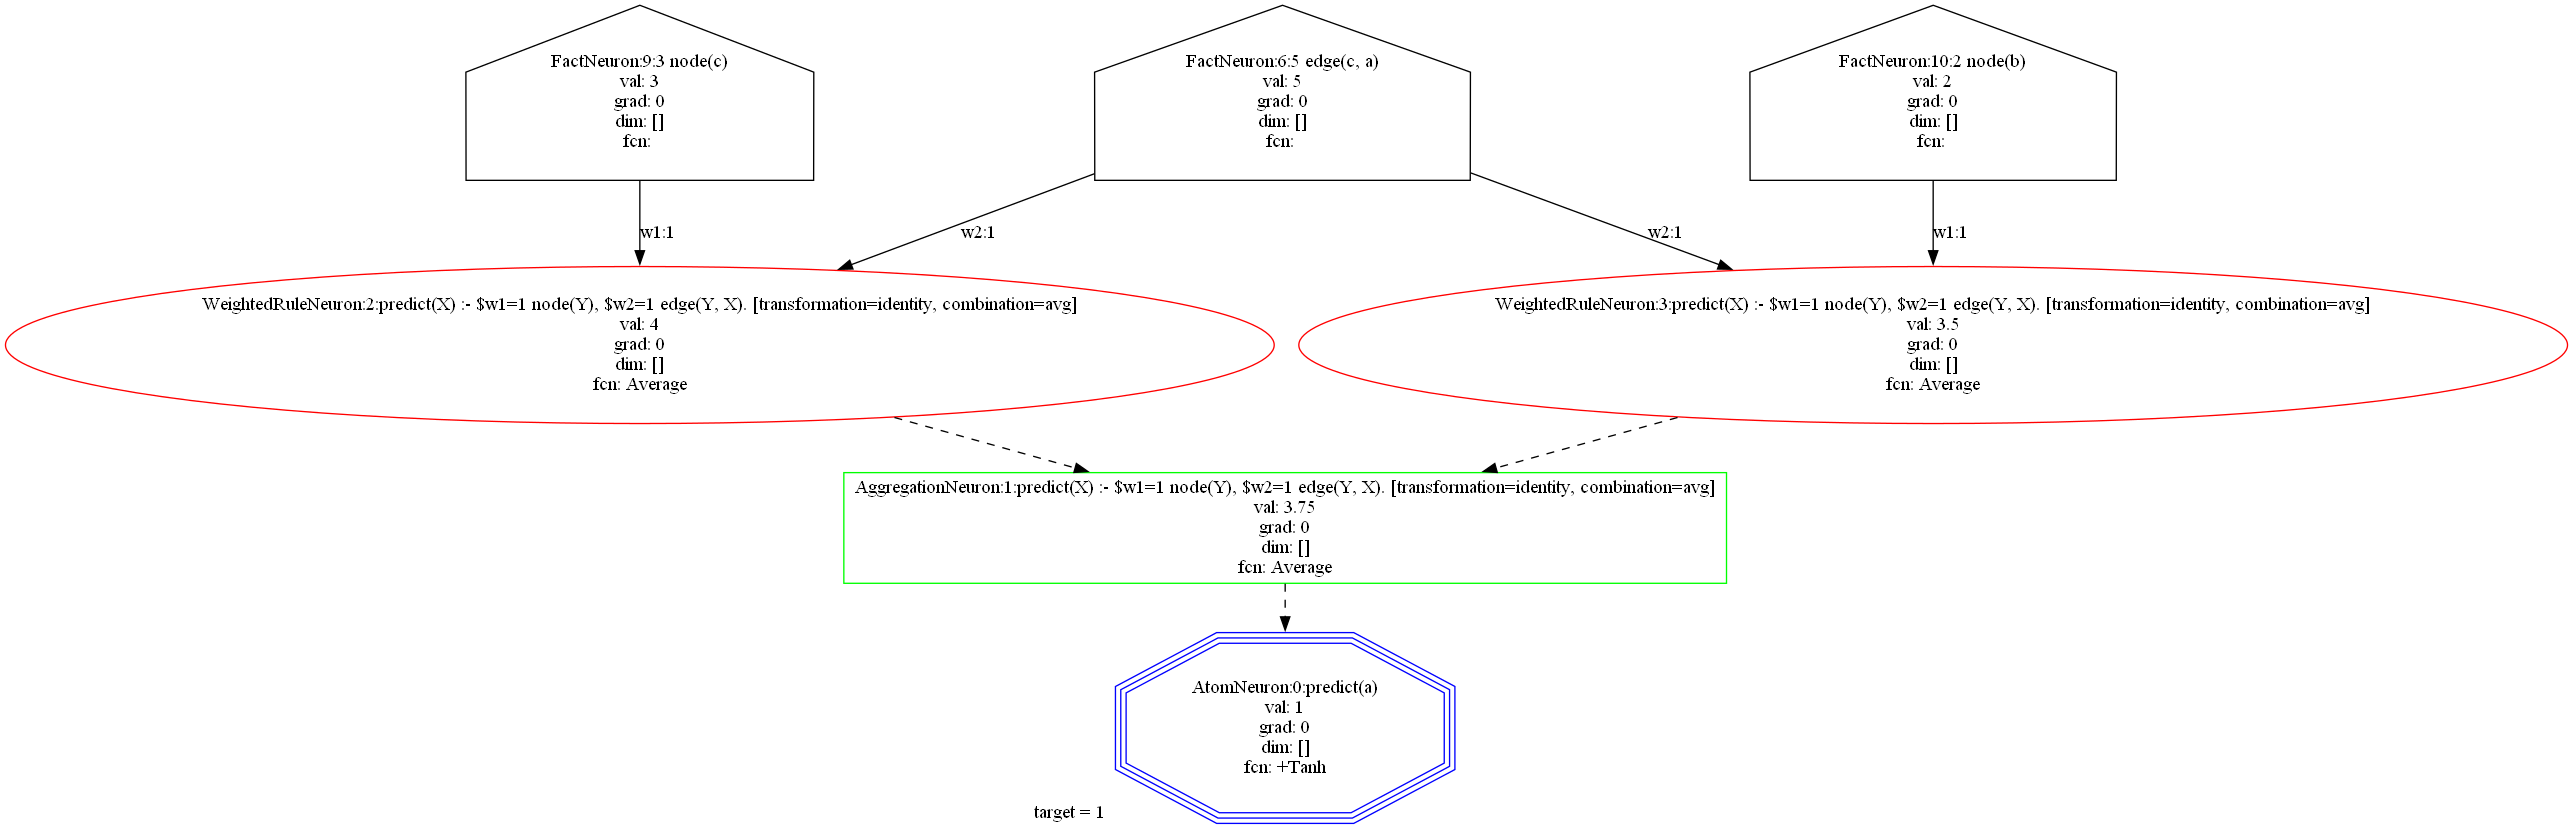

In [16]:
settings = Settings(optimizer=SGD(), epochs=1)

neuralogic_evaluator = get_evaluator(template, settings)

build_dataset = neuralogic_evaluator.build_dataset(train_dataset)

for _ in neuralogic_evaluator.train(train_dataset):
    pass

build_dataset[0].draw()